In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/TSLA (3).CSV")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
#i will be doing univariate analysis

In [4]:
data = df[['Date','Close']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
data.Date.dtype

dtype('O')

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-7-1a72a8b5b870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
data = data.set_index("Date")

In [10]:
data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [11]:
data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


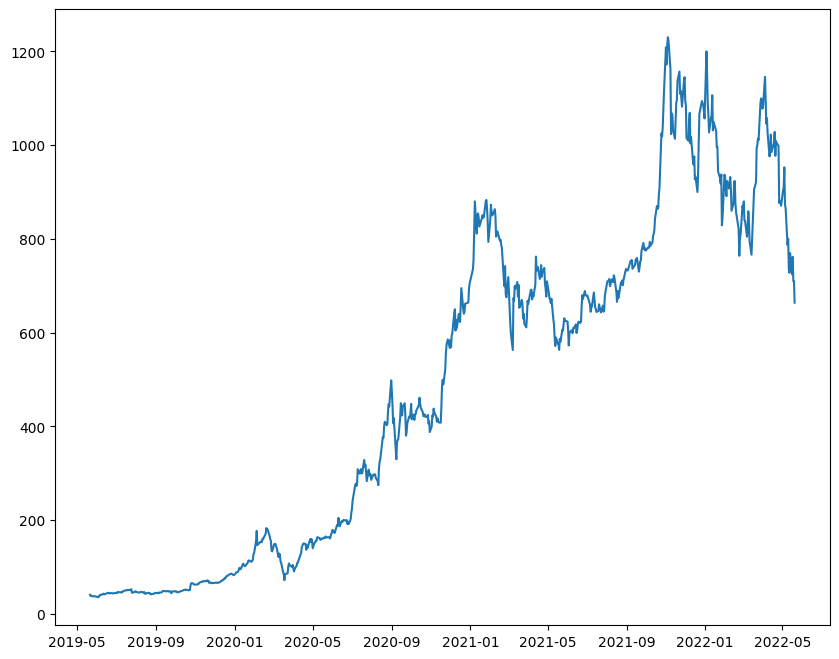

In [12]:
plt.figure(figsize=(10,8))
plt.plot(data)

This graph depicts a clear story: from May 2019 to November 2021, there's a steady increase, suggesting growth or improvement in the measured value. However, after peaking around November 2021, there's a notable drop until May 2022. The graph essentially tells a tale of two periods: a time of growth followed by a significant decline.**bold text**

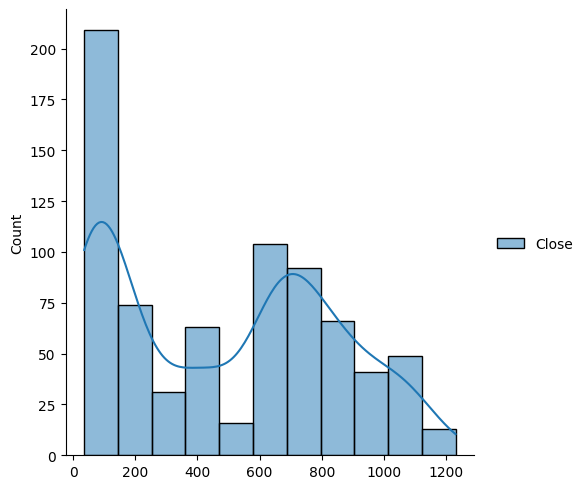

In [13]:
sns.displot(data,kde=True)

The histogram with the KDE plot gives a clear picture of the distribution of the 'Close' dataset. Most values cluster around the middle, with fewer instances at the extremes. The smooth blue line helps visualize the density, highlighting where values are most common.**bold text**

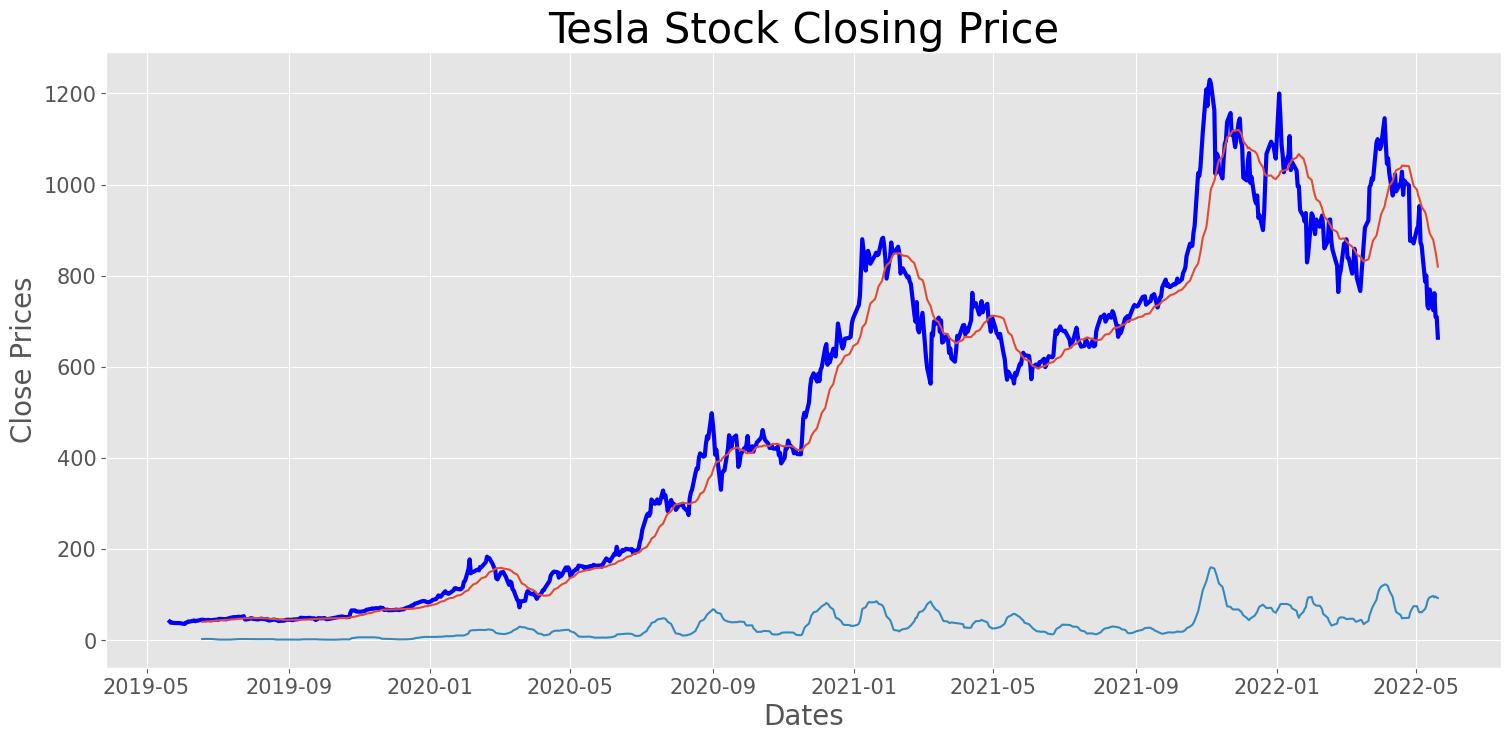

In [14]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(data['Close'], linewidth = 3, color = 'blue')
plt.plot(data['Close'].rolling(window=(20)).mean())
plt.plot(data['Close'].rolling(window=(20)).std())
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adaf = adfuller(data)

In [17]:
adaf

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [18]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


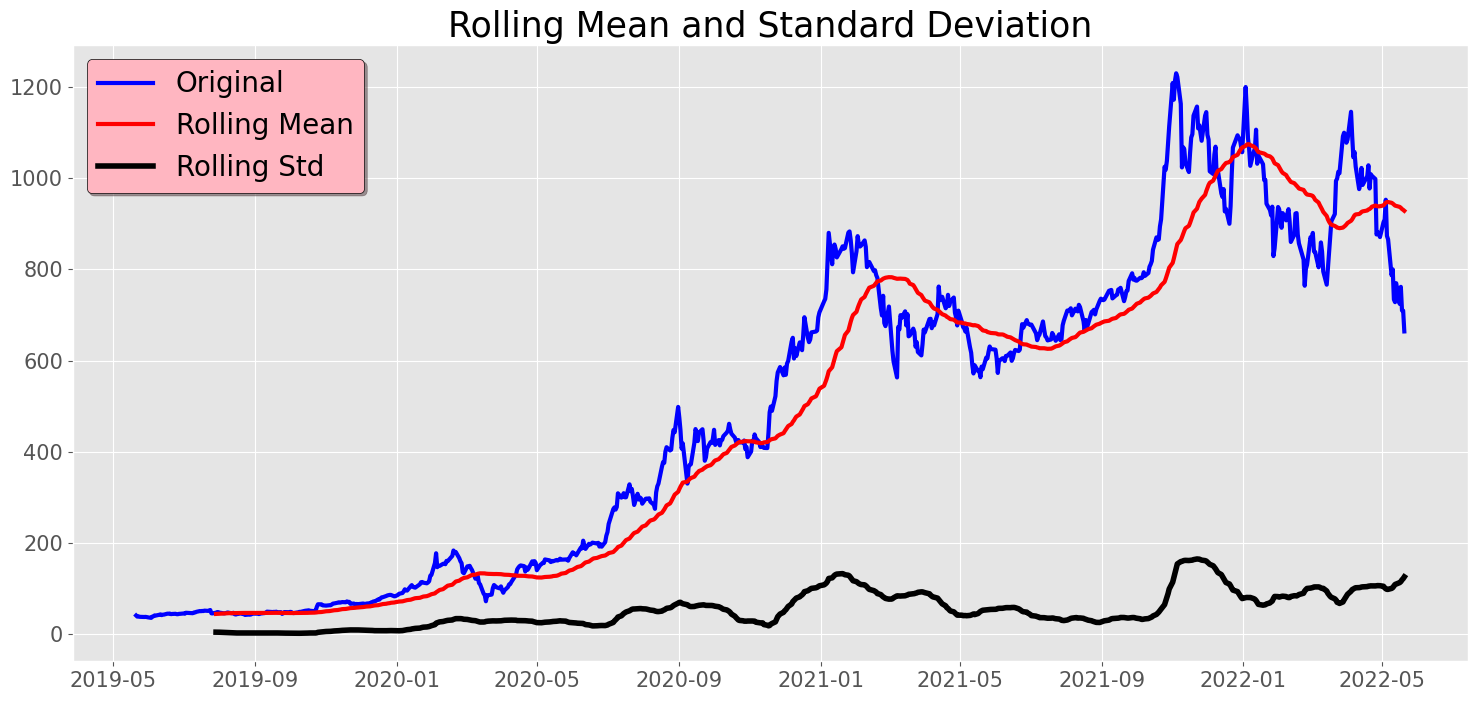

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [19]:
test_stationarity(data)

<Axes: ylabel='Close'>

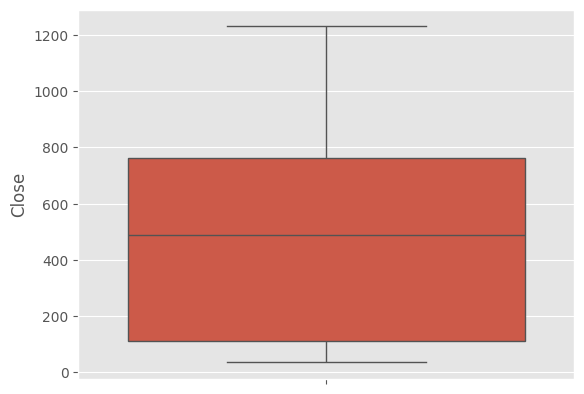

In [20]:
sns.boxplot(data['Close'])

In [23]:
data_close = data.Close.diff()

In [25]:
data_close = data_close.dropna()

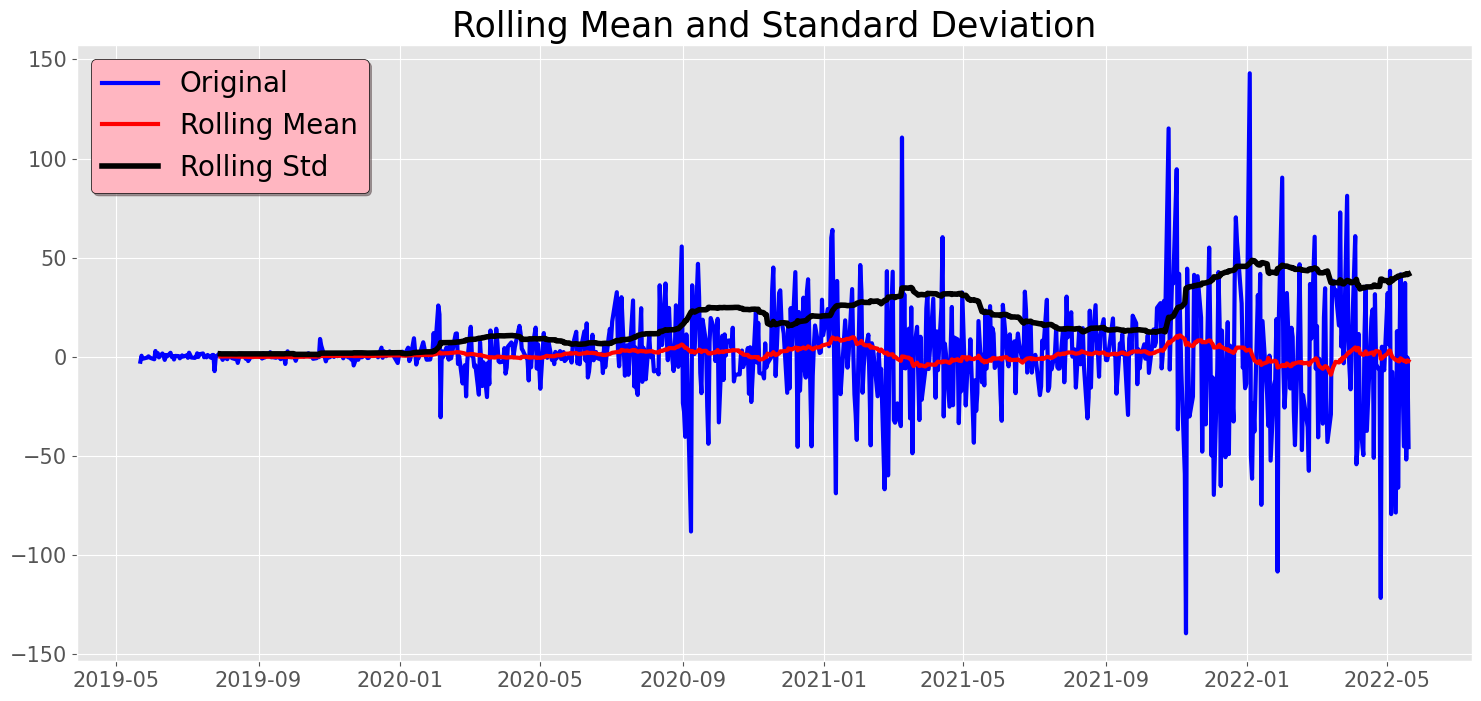

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [26]:
test_stationarity(data_close)

In [27]:
data_close

,Close
Date,
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998
2019-05-29,0.231998
...,...
2022-05-16,-45.220032
2022-05-17,37.239990
2022-05-18,-51.799988


In [43]:
train_data = data[0:-60]
test_data = data[-60:]

In [53]:
train_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-02-17,876.349976
2022-02-18,856.979980
2022-02-22,821.530029


In [44]:
test_data

,Close
Date,
2022-02-25,809.869995
2022-02-28,870.429993
2022-03-01,864.369995
2022-03-02,879.890015
2022-03-03,839.289978
2022-03-04,838.289978
2022-03-07,804.580017
2022-03-08,824.400024
2022-03-09,858.969971


In [58]:
history = [i for i in train_data['Close']]

In [59]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [60]:
import statsmodels.tsa.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [81]:
import statsmodels.tsa.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

history = [x for x in train_data["Close"]]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    # Access the 'Close' value using iloc to get the row by index
    history.append(test_data.iloc[t]['Close'])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data['Close'], predictions)))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE of ARIMA Model: 39.43992944070974


In [87]:
predictions

[array([799.14261837]),
 array([808.97929651]),
 array([868.26360628]),
 array([863.81022079]),
 array([878.78577321]),
 array([839.68200138]),
 array([837.6330699]),
 array([804.81080525]),
 array([823.17086485]),
 array([857.363033]),
 array([838.1984551]),
 array([795.799373]),
 array([766.3876417]),
 array([800.35671771]),
 array([838.73442083]),
 array([870.33055805]),
 array([904.15551277]),
 array([920.20586849]),
 array([992.45736903]),
 array([998.2717332]),
 array([1013.0300798]),
 array([1009.8950361]),
 array([1090.29623004]),
 array([1098.7386982]),
 array([1093.25882832]),
 array([1076.94296881]),
 array([1083.76536681]),
 array([1144.29443946]),
 array([1091.49333004]),
 array([1045.39384828]),
 array([1056.42652471]),
 array([1025.03146763]),
 array([975.35779091]),
 array([986.07514994]),
 array([1021.29735509]),
 array([984.59660155]),
 array([1003.26978212]),
 array([1027.07065924]),
 array([977.01402962]),
 array([1007.35781537]),
 array([1004.33987804]),
 array([99

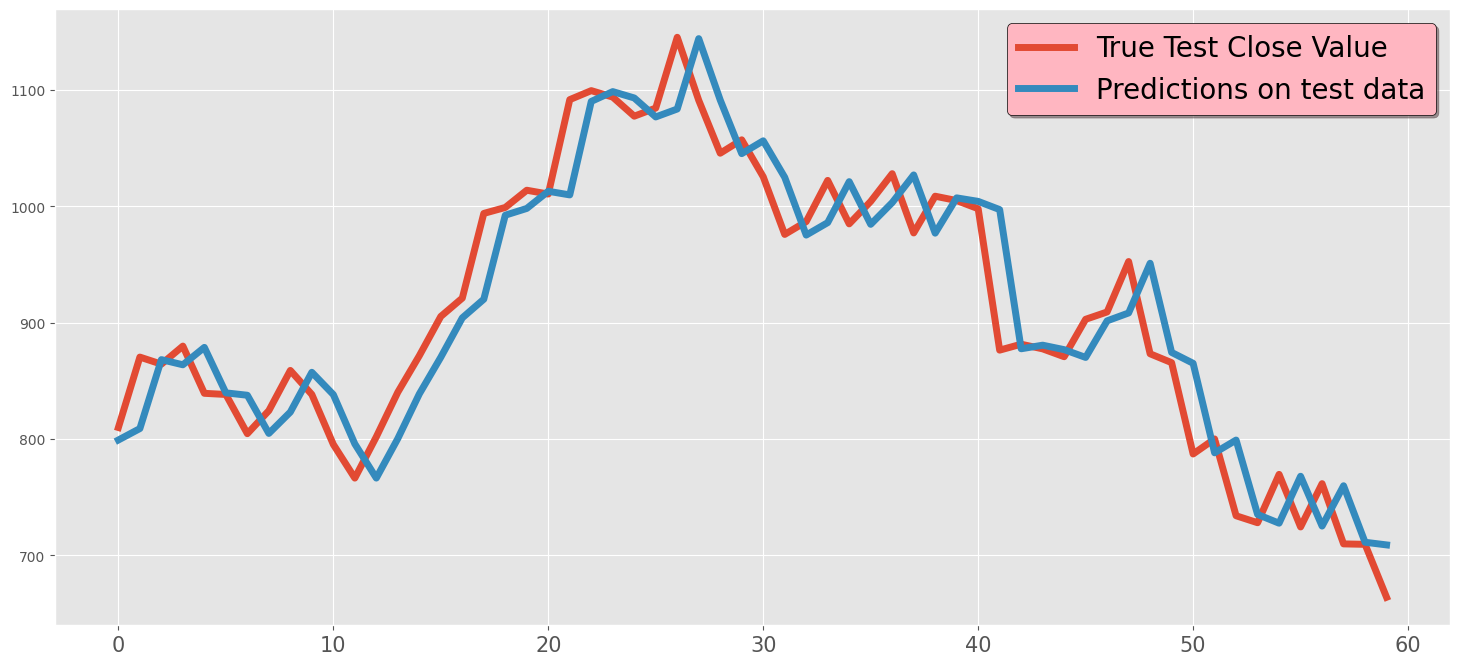

In [88]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [90]:
fc_series = pd.Series(predictions, index=test_data.index)

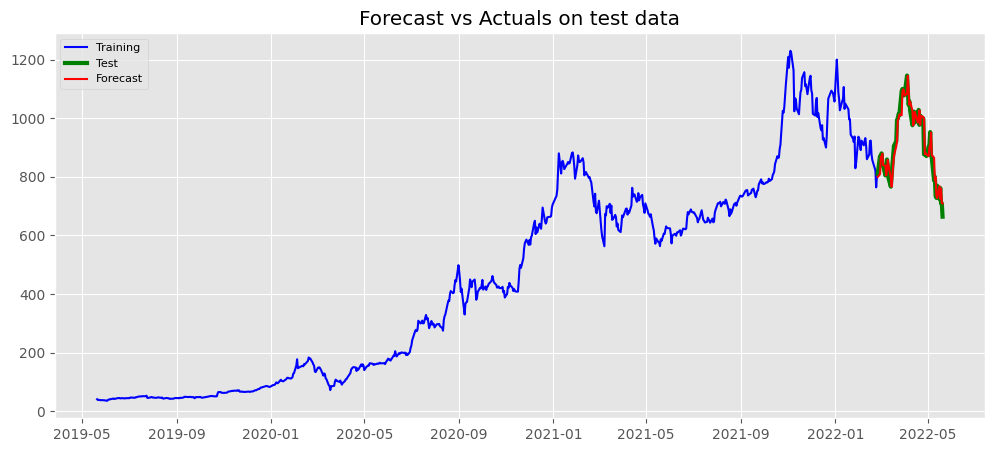

In [91]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()